<font color='#B03A2E'><font size="5">Superstore Data Analysis</font>

### Table of Contents
* Sales Performance Analysis
    * [How are the sales trending over time?](#section_1_1)
    * [Which ship mode is most frequently chosen by customers?](#section_1_2)
    * [What are the top-selling categories?](#section_1_3)
* Geographical Insights
    * [Which countries, cities, or states contribute the most to the sales revenue?](#section_2_1)
    * [Are there any specific regions where sales are consistently lower? What factors might be contributing to this?](#section_2_2)
    
* Customer Segmentation
    * [Use the Recency, Frequency, and Monetary (RFM) framework to segment customers.](#section_3_1)

* Product Analysis
    * [Most sold products](#section_4_1)

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data

df=pd.read_csv('train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Checking NULL values

In [5]:
#Checking for NULL values count for all columns

df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### Data Manipulation ###

In [7]:
#To check the records of the NULL values

df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [14]:
# Since all the null values are from United States	Burlington	Vermont, Replacing null with correct postal code-5401 

df['Postal Code'].fillna(5401,inplace=True)

In [9]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
# Checking the dulicate values

df.duplicated().sum()

0

In [11]:
# Change data types- convert datatypes to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'],format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format = '%d/%m/%Y')

In [12]:
df.info()
df.to_csv('cleaned_superstore_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

### How are the sales trending over time? <a id="section_1_1"></a>

In [13]:
# Getting the sales for quarters

order_date_df = df.set_index('Order Date')
quarterly_sales = order_date_df['Sales'].resample('Q').sum()
quarterly_sales = quarterly_sales.round(2)
quarterly_sales.head()

Order Date
2015-03-31     73931.40
2015-06-30     85874.09
2015-09-30    142522.61
2015-12-31    177528.11
2016-03-31     62357.69
Freq: Q-DEC, Name: Sales, dtype: float64

Text(0, 0.5, 'Total Sales')

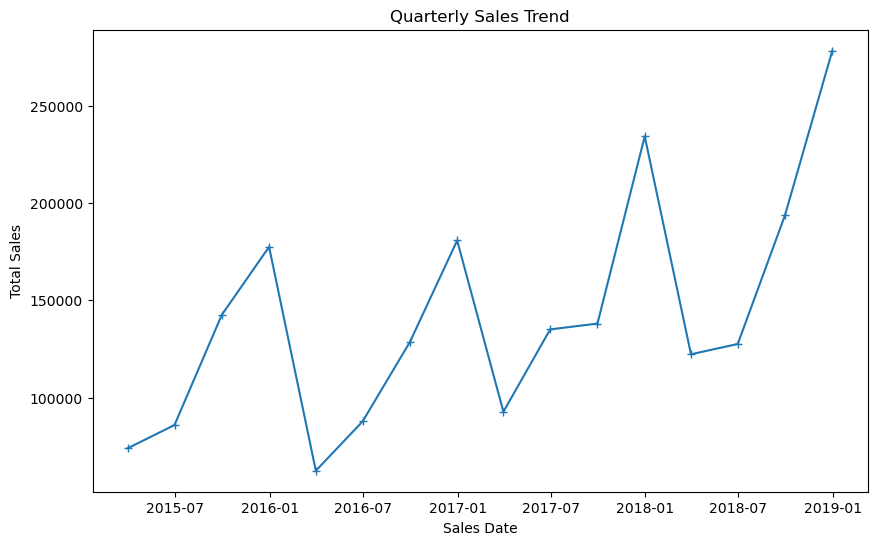

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(quarterly_sales.index,quarterly_sales.values,marker='+')
ax.set_title('Quarterly Sales Trend')
ax.set_xlabel('Sales Date')
ax.set_ylabel('Total Sales')

#### As we can see, sales peak in January of almost every year. Almost every year, after January, sales decrease but start to increase again from April to January.

### Which ship mode is most frequently chosen by customers? <a id="section_1_2"></a>

In [15]:
df['Ship Mode'].value_counts().head(5)

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

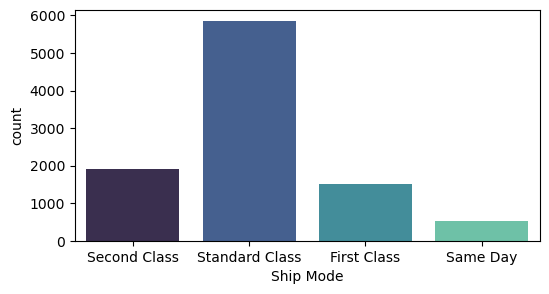

In [16]:
ax,fig = plt.subplots(figsize=(6,3))
sns.countplot(data=df,x='Ship Mode',palette='mako')

### What are the top-selling categories? <a id="section_1_3"></a>

<Axes: xlabel='Category', ylabel='Sales'>

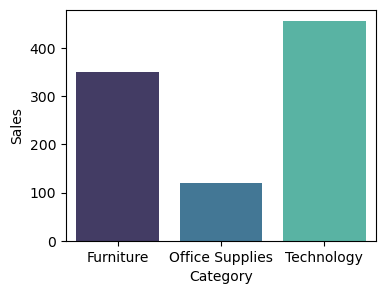

In [17]:
ax,fig = plt.subplots(figsize=(4,3)) 
    
sns.barplot(x='Category',y='Sales',data=df,errorbar=None,palette='mako')

#### We can see that Technology category products have the highest sales. What product in technology have highest Sales?

In [18]:
Technology_df = df[df['Category']=='Technology']
Technology_df['Sub-Category'].value_counts().head(5)

Phones         876
Accessories    756
Machines       115
Copiers         66
Name: Sub-Category, dtype: int64

In [19]:
product_df = df.groupby('Product Name').sum(numeric_only=True).sort_values('Sales', ascending=False)
product_df = product_df[['Sales']]
product_df['Sales'] = product_df['Sales'].round(2)
product_df['Amount'] = df['Product Name'].value_counts()
product_df.reset_index(inplace=True)
product_df['Price'] = round(product_df['Sales']/product_df['Amount'],2)
product_df.head(10)


,Product Name,Sales,Amount,Price
0,Canon imageCLASS 2200 Advanced Copier,61599.82,5,12319.96
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,10,2745.34
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48,1,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58,8,2733.82
4,GBC DocuBind TL300 Electric Binding System,19823.48,11,1802.13
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50,9,2113.83
6,Hewlett Packard LaserJet 3310 Copier,18839.69,8,2354.96
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90,3,6124.97
8,GBC DocuBind P400 Electric Binding System,17965.07,6,2994.18
9,High Speed Automatic Electric Letter Opener,17030.31,3,5676.77


## Geographical Insights

### Which countries, cities, or states contribute the most to the sales revenue?<a id="section_2_1"></a>

In [50]:
# Creating a dataframe according to our need- State and Sales(sum)

top_states = df.groupby('State')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
top_states['Sales']=top_states['Sales'].round(1)

top_states = top_states.head(10)
top_states.head()
top_states.to_csv('top_states.csv')

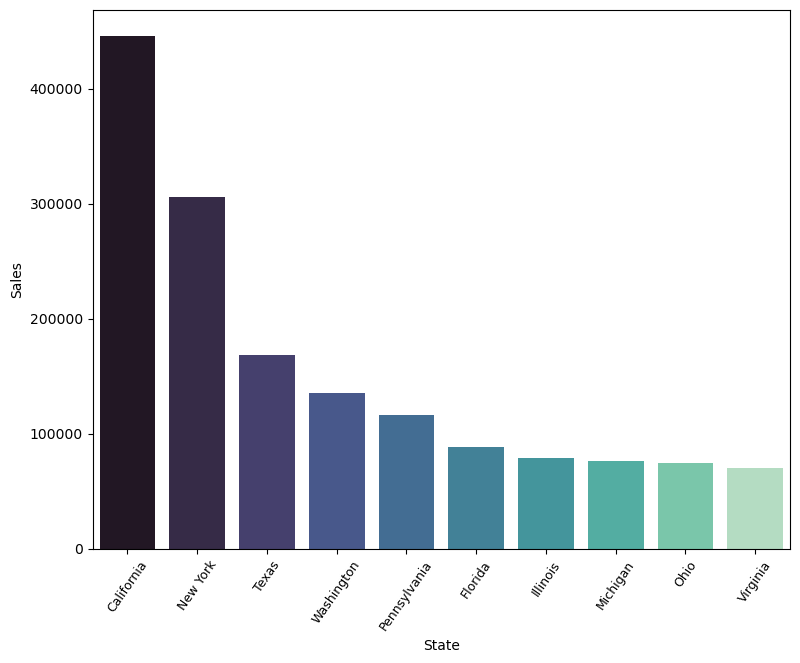

In [21]:
# plotting

ax,fig = plt.subplots(figsize=(9,7))
sns.barplot(data=top_states,x='State',y='Sales',palette='mako')
plt.xticks(fontsize=9, rotation=55)
plt.show()

In [22]:
# Creating a dataframe according to our need- City and Sales(sum)

top_Cities = df.groupby('City')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
top_Cities['Sales']=top_Cities['Sales'].round(1)

top_Cities = top_Cities.head(10)

top_Cities.head()

,City,Sales
327,New York City,252462.5
265,Los Angeles,173420.2
450,Seattle,116106.3
436,San Francisco,109041.1
372,Philadelphia,108841.7


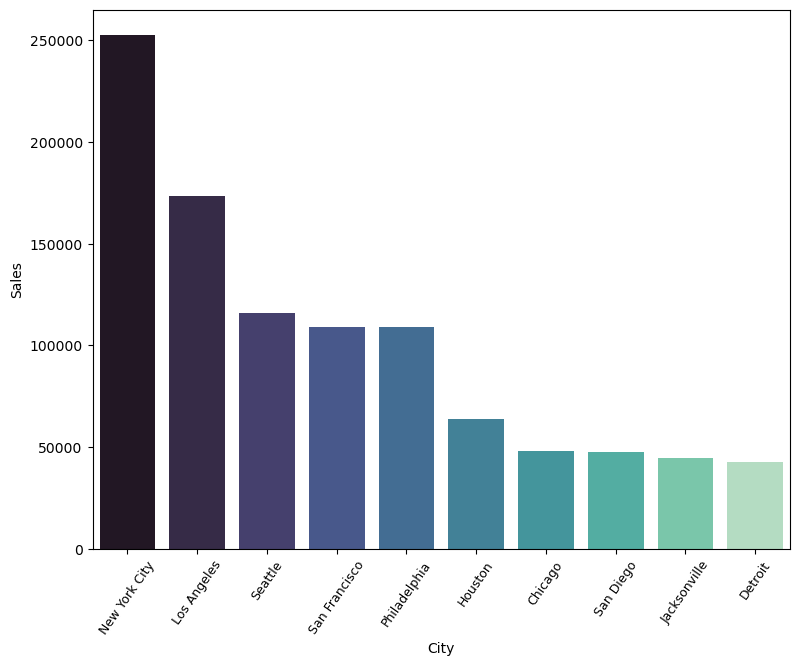

In [23]:
# plotting

ax,fig = plt.subplots(figsize=(9,7))
sns.barplot(data=top_Cities,x='City',y='Sales',palette='mako')
plt.xticks(fontsize=9, rotation=55)
plt.show()

As we can see in top 10 states, California is the state that contribute the most to sales revenue. About the cities, New York City is the city that contribute the most to sales revenue.

#### Are there any specific regions where sales are consistently lower? What factors might be contributing to this?<a id="section_2_2"></a>

In [24]:
Region_df = order_date_df.groupby('Region')['Sales'].resample('Q').sum().reset_index()
Region_df = Region_df.sort_values('Sales',ascending=False)


In [25]:
Region_df.head()

,Region,Order Date,Sales
31,East,2018-12-31,97214.3650
63,West,2018-12-31,79573.3940
62,West,2018-09-30,73346.1300
59,West,2017-12-31,71650.8970
11,Central,2017-12-31,68047.5978


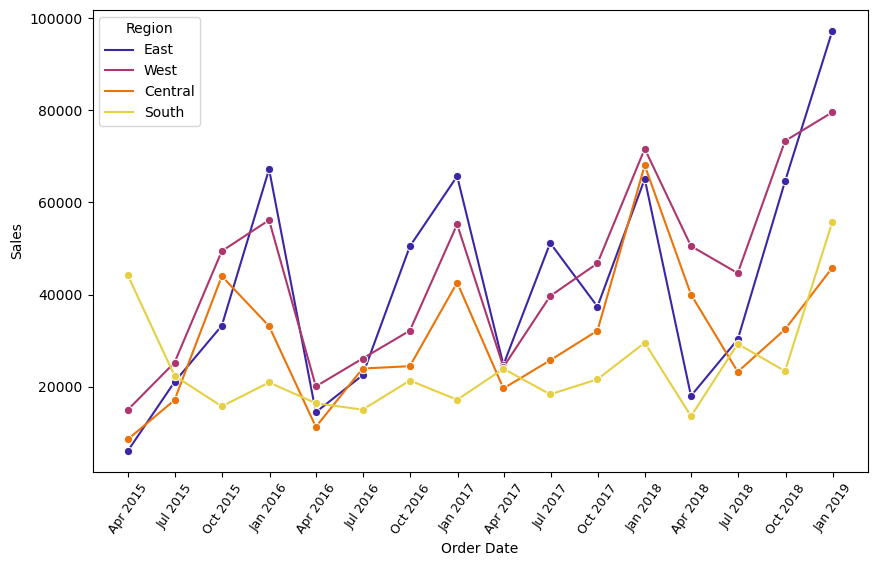

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=Region_df,x='Order Date',y='Sales',hue='Region',marker='o',palette='CMRmap',ax=ax)

plt.xticks(fontsize=9, rotation=55)
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

### Insights:
* Seasonality in the data is observed for East, West and Central regions.
* Peaks in Q4 (labelled as Jan in the plot) and dips in Q1 (labelled as Apr in the plot) show the seasonality for the above mentioned regions.
* There are always dips observed in the start of the new year quarter.
* West region has a rising trend in sales throughout the time while East only shows a significant rise after April 2018.
* Central region shows a rising trend till 2017 end while the southern region stays flat from Mid 2015 - 2017.
* A significant rise in sales (compared to previous years) is seen for all regions (except Central) after April 2018. 

#### Use the Recency, Frequency, and Monetary (RFM) framework to segment customers. <a id="section_3_1"></a>

### Customer Segmentation

* Recency- How recently the customer did a purchase?
* frequency - How frequently the customer purchases?
* Monetory -  total monetory value of the purchase?

In [27]:
# Calculating recency

recency_df = df.groupby('Customer Name', as_index=False)['Order Date'].max()

In [28]:
recency_df.head()

,Customer Name,Order Date
0,Aaron Bergman,2017-11-10
1,Aaron Hawkins,2018-12-18
2,Aaron Smayling,2018-10-03
3,Adam Bellavance,2018-11-06
4,Adam Hart,2018-11-26


In [29]:
recent_date = recency_df['Order Date'].max()
recent_date

Timestamp('2018-12-30 00:00:00')

In [30]:
recency_df['Recency'] = recency_df['Order Date'].apply(
lambda x: (recent_date - x).days)
recency_df.rename(columns={'Order Date':'Last Purchase Date'},inplace=True)

In [31]:
recency_df.head()

,Customer Name,Last Purchase Date,Recency
0,Aaron Bergman,2017-11-10,415
1,Aaron Hawkins,2018-12-18,12
2,Aaron Smayling,2018-10-03,88
3,Adam Bellavance,2018-11-06,54
4,Adam Hart,2018-11-26,34


In [32]:
# calculating frequency

# how many times each customer has ordered
freq_df = df.groupby('Customer Name',as_index=False)['Order Date'].count()
freq_df.rename(columns={'Order Date':'Frequency'},inplace=True)
freq_df.head()

,Customer Name,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


In [33]:
df['Customer Name'].value_counts().reset_index().sort_values('index').reset_index(drop=True)

,index,Customer Name
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20
...,...,...
788,Xylona Preis,28
789,Yana Sorensen,12
790,Yoseph Carroll,8
791,Zuschuss Carroll,31


In [34]:
# Calculating Monetory

monetory_df = df.groupby('Customer Name')['Sales'].sum().reset_index()
monetory_df.rename(columns={'Sales':'Monetory'},inplace=True)
monetory_df.head()

,Customer Name,Monetory
0,Aaron Bergman,886.156
1,Aaron Hawkins,1744.700
2,Aaron Smayling,3050.692
3,Adam Bellavance,7755.620
4,Adam Hart,3250.337


In [35]:
# merging the dataframes

final_df = recency_df.merge(freq_df, on='Customer Name')
final_df = final_df.merge(monetory_df,on='Customer Name')
final_df['Monetory']=final_df['Monetory'].round(2)
final_df.drop(columns = ['Last Purchase Date'],inplace=True,axis=1)

In [36]:
final_df

,Customer Name,Recency,Frequency,Monetory
0,Aaron Bergman,415,6,886.16
1,Aaron Hawkins,12,11,1744.70
2,Aaron Smayling,88,10,3050.69
3,Adam Bellavance,54,18,7755.62
4,Adam Hart,34,20,3250.34
...,...,...,...,...
788,Xylona Preis,43,28,2374.66
789,Yana Sorensen,9,12,6720.44
790,Yoseph Carroll,4,8,5454.35
791,Zuschuss Carroll,54,31,8025.71


In [37]:
rank_df = final_df.copy()

In [38]:
# Normalizing the data

rank_df['r_rank'] = rank_df['Recency'].rank(ascending=False)
rank_df['f_rank'] = rank_df['Frequency'].rank(ascending=False)
rank_df['m_rank'] = rank_df['Monetory'].rank(ascending=False)

rank_df['r_rank_norm'] = (rank_df['r_rank'] / rank_df['r_rank'].max()) * 100
rank_df['f_rank_norm'] = (rank_df['f_rank'] / rank_df['f_rank'].max()) * 100
rank_df['m_rank_norm'] = (rank_df['m_rank'] / rank_df['m_rank'].max()) * 100

rank_df.drop(['r_rank','f_rank','m_rank'], axis=1, inplace=True)

In [39]:
rank_df

,Customer Name,Recency,Frequency,Monetory,r_rank_norm,f_rank_norm,m_rank_norm
0,Aaron Bergman,415,6,886.16,9.286166,86.907021,81.588903
1,Aaron Hawkins,12,11,1744.70,90.524321,52.941176,59.016393
2,Aaron Smayling,88,10,3050.69,46.430828,60.404807,34.174023
3,Adam Bellavance,54,18,7755.62,59.570436,17.900063,5.170240
4,Adam Hart,34,20,3250.34,73.025900,11.827957,30.138714
...,...,...,...,...,...,...,...
788,Xylona Preis,43,28,2374.66,65.255843,2.277040,46.279950
789,Yana Sorensen,9,12,6720.44,92.040430,46.932321,7.440101
790,Yoseph Carroll,4,8,5454.35,97.346810,74.636306,12.105927
791,Zuschuss Carroll,54,31,8025.71,59.570436,1.138520,4.665826


#### Calculating RFM score = (0.5 * Recency) + (0.3 * Frequency) + (0.2 * Monetory)

In [40]:
rank_df['RFM score'] =  (0.5 * rank_df['r_rank_norm']) + (0.3 * rank_df['f_rank_norm']) + (0.2 * rank_df['m_rank_norm'])
rank_df = rank_df[['Customer Name','RFM score']]
rank_df['RFM score']=round(rank_df['RFM score']*0.05,2)

#### Rating Customer based upon the RFM score

rfm score >4.5 : Top Customer
    
4.5 > rfm score > 4 : High Value Customer
    
4>rfm score >3 : Medium value customer
    
3>rfm score>1.6 : Low-value customer
    
rfm score<1.6 :Lost Customer

In [41]:
top_customer = (rank_df['RFM score'] >= 4.5)
High_value_customer = ((rank_df['RFM score'] < 4.5) & (rank_df['RFM score'] >= 3.5))
Med_value_customer = ((rank_df['RFM score'] < 3.5) & (rank_df['RFM score'] >= 2.5))
low_value_customer = ((rank_df['RFM score'] < 2.5) & (rank_df['RFM score'] >= 1.5))
lost_customer = (rank_df['RFM score'] < 1.5)

In [42]:
rank_df.loc[top_customer, 'Customer Segment'] = 'Top Customer'
rank_df.loc[High_value_customer, 'Customer Segment'] = 'High_value_customer'
rank_df.loc[Med_value_customer, 'Customer Segment'] = 'Med_value_customer'
rank_df.loc[low_value_customer, 'Customer Segment'] = 'low_value_customer'
rank_df.loc[lost_customer, 'Customer Segment'] = 'lost_customer'

In [53]:
rank_df.to_csv('Customer_segmentation.csv')
rank_df.head()

,Customer Name,RFM score,Customer Segment
0,Aaron Bergman,2.35,low_value_customer
1,Aaron Hawkins,3.65,High_value_customer
2,Aaron Smayling,2.41,low_value_customer
3,Adam Bellavance,1.81,low_value_customer
4,Adam Hart,2.30,low_value_customer


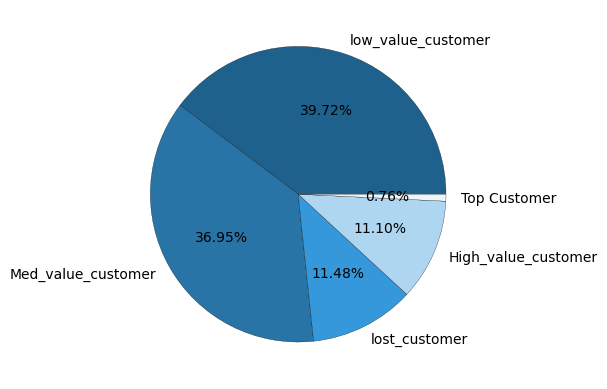

In [44]:
colors = ['#1F618D','#2874A6','#3498DB','#AED6F1','#EBF5FB']
plt.pie(rank_df['Customer Segment'].value_counts(),labels=rank_df['Customer Segment'].value_counts().index,colors=colors,
        autopct='%.2f%%',wedgeprops={'edgecolor':'black','linewidth':0.2})
plt.show()

### Product Analysis <a id="section_4_1"></a>

#### Most sold products?

In [45]:
# let's use the dataframe we created while Product analysis

top_10_products = product_df.sort_values(by='Amount',ascending = False).head(15)

In [46]:
top_10_products

,Product Name,Sales,Amount,Price
351,Staple envelope,1675.65,47,35.65
595,Staples,755.47,46,16.42
251,Easy-staple paper,2414.16,44,54.87
1053,Avery Non-Stick Binders,217.32,20,10.87
978,Staple remover,263.09,18,14.62
777,Staples in misc. colors,459.66,18,25.54
124,KI Adjustable-Height Table,4466.66,17,262.74
952,Storex Dura Pro Binders,278.59,17,16.39
812,Staple-based wall hangings,422.29,16,26.39
162,"Situations Contoured Folding Chairs, 4/Set",3641.27,15,242.75


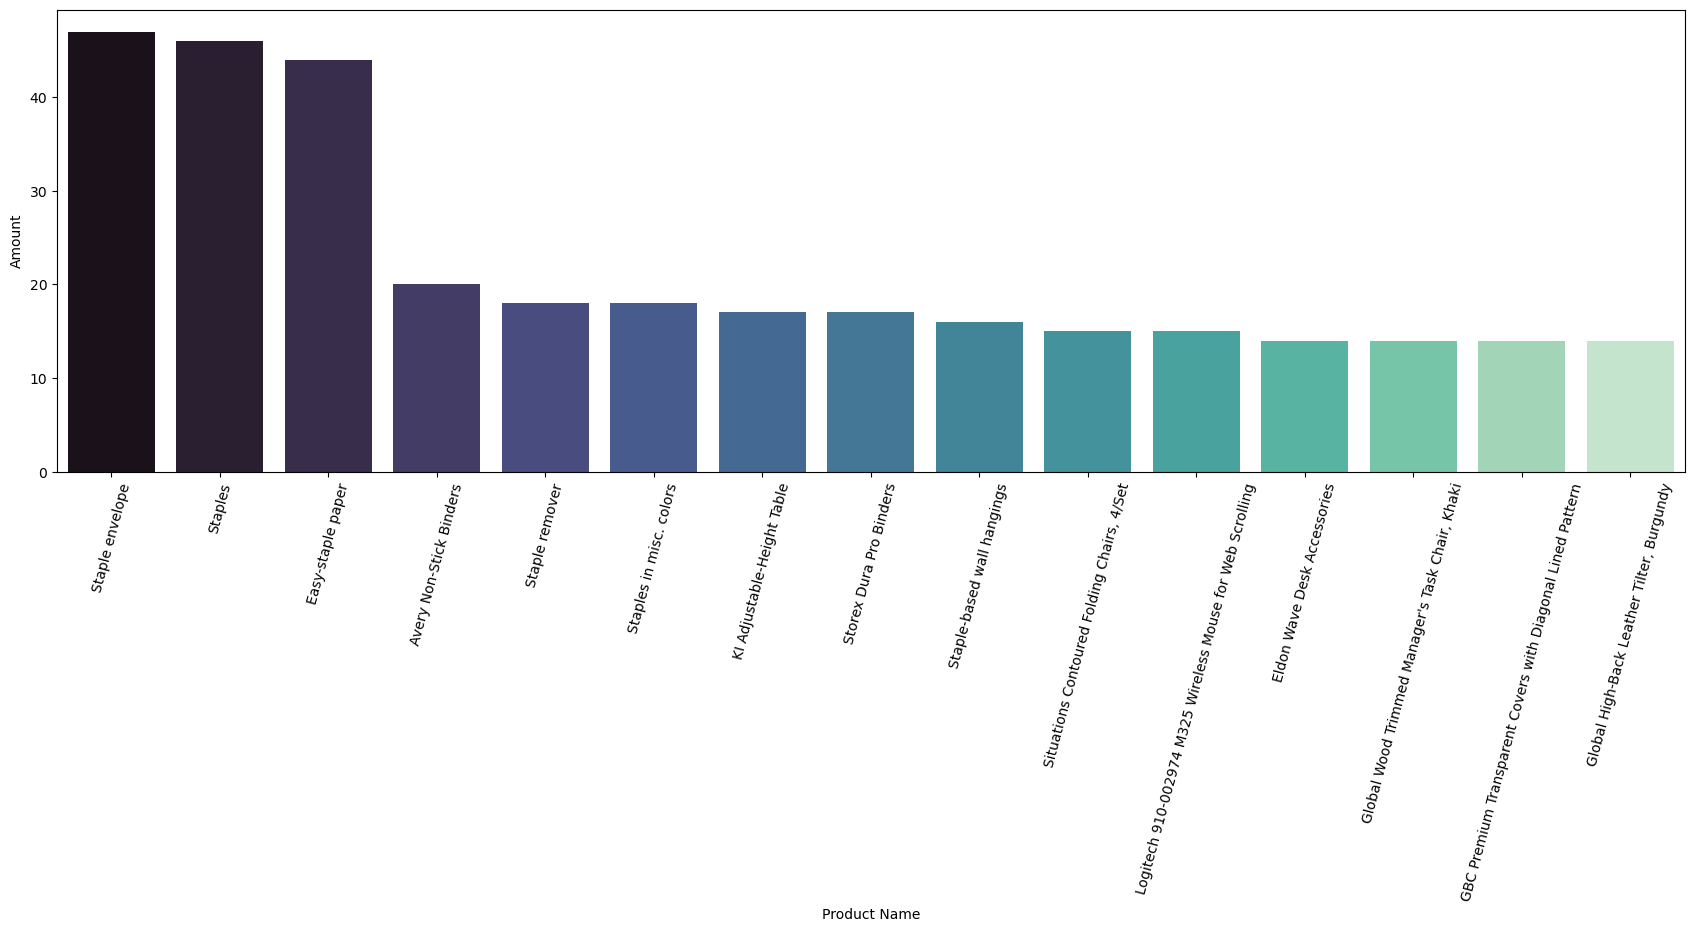

In [47]:
plt.figure(figsize=(21, 6))


sns.color_palette("mako", as_cmap=True)
sns.barplot(data=top_10_products,x='Product Name',y='Amount',palette='mako')
plt.xticks(fontsize=10, rotation=75)
plt.show()